In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
test_df = pd.read_csv('test.csv')

In [3]:
test_df.shape

(1459, 80)

In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
## Dropping the Features which is having more than 50 % missing values
test_df1 = test_df.copy()
test_df1.isnull().mean().sort_values(ascending=False).nlargest(5)
test_df1.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [7]:
test_df1.shape

(1459, 75)

In [8]:
## MSZoning having the missing only only in Test Data
test_df1['MSZoning'].fillna(test_df1['MSZoning'].mode()[0], inplace=True)

In [9]:
## Filling the missing value of LotFrontage with Random Sample Imputation
random_sample = test_df1["LotFrontage"].dropna().sample(test_df1['LotFrontage'].isnull().sum(), random_state=0)
random_sample.index = test_df1[test_df1['LotFrontage'].isnull()].index
test_df1.loc[test_df1['LotFrontage'].isnull(), 'LotFrontage'] = random_sample

In [10]:
### Filling the missing value with mode This is only on Test Data
test_df1.Utilities.fillna(test_df1.Utilities.mode()[0], inplace=True)

In [11]:
## Filling The Exterior1st feature with mode this is only on Test Data
test_df1.Exterior1st.fillna(test_df1.Exterior1st.mode()[0], inplace=True)

In [12]:
## Filling The Exterior1st featdure with mode this is only on Test Data
test_df1.Exterior2nd.fillna(test_df1.Exterior2nd.mode()[0], inplace=True)

In [13]:
## Filling the missing value with mode
test_df1.MasVnrType.fillna(test_df1.MasVnrType.mode()[0], inplace=True)

In [14]:
### Filling the MasVnrArea feature with mode value
test_df1.MasVnrArea.fillna(test_df1.MasVnrArea.median(), inplace=True)

In [15]:
## Filling the missing values of BsmtQual Feature with mode value
test_df1.BsmtQual.fillna(test_df1.BsmtQual.mode()[0], inplace=True)

In [16]:
## Filling the missing values of BsmtCond Feature with mode value
test_df1.BsmtCond.fillna(test_df1.BsmtCond.mode()[0], inplace=True)

In [17]:
## Filling the missing valaues of BsmtExposure feature with mode value
test_df1.BsmtExposure.fillna(test_df1.BsmtExposure.mode()[0], inplace=True)

In [18]:
### Filiing he missing values of BsmtFinTpe1 feature with mode value
test_df1.BsmtFinType1.fillna(test_df1.BsmtFinType1.mode()[0], inplace=True)

<AxesSubplot:>

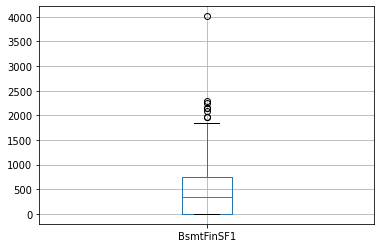

In [19]:
test_df1.boxplot('BsmtFinSF1')

In [20]:
## This is only for test data, filling the missing value of BsmtFinSF1 with median value
test_df1.BsmtFinSF1.fillna(test_df1.BsmtFinSF1.median(), inplace=True)

In [21]:
### Filling the missing values of BsmtFintype2 featdure with mode value
test_df1.BsmtFinType2.fillna(test_df1.BsmtFinType2.mode()[0], inplace=True)

<AxesSubplot:>

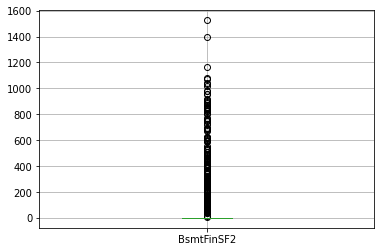

In [22]:
test_df1.boxplot('BsmtFinSF2')

In [23]:
## This for only test Data , filling the missing value with median 
test_df1.BsmtFinSF2.fillna(test_df1.BsmtFinSF2.median(), inplace=True)

<AxesSubplot:>

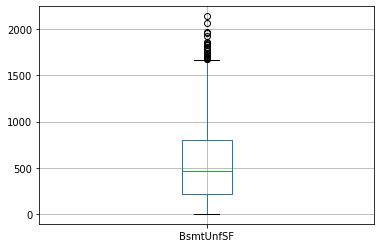

In [24]:
test_df1.boxplot('BsmtUnfSF')

In [25]:
## This is also for test Data only fillng the missing value with median
test_df1.BsmtUnfSF.fillna(test_df1.BsmtUnfSF.median(), inplace=True)

<AxesSubplot:>

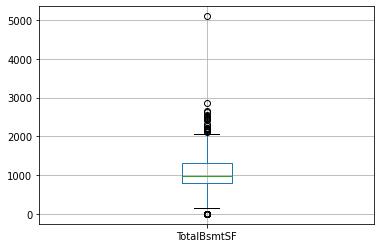

In [26]:
test_df1.boxplot('TotalBsmtSF')

In [27]:
## This is also for test Data Only filling the missing value with median
test_df1.TotalBsmtSF.fillna(test_df1.TotalBsmtSF.median(), inplace=True)

In [28]:
## this two for test data only Filling with mode
test_df1.BsmtFullBath.fillna(test_df1.BsmtFullBath.mode()[0], inplace=True)
test_df1.BsmtHalfBath.fillna(test_df1.BsmtHalfBath.mode()[0], inplace=True)

In [29]:
# This is for test data only fill this missing values using mode
test_df1.KitchenQual.fillna(test_df1.KitchenQual.mode()[0], inplace=True)

In [30]:
## This is only for test Data we fill using mode
test_df1.Functional.fillna(test_df1.Functional.mode()[0], inplace=True)

In [31]:
## Filling the missing value with mode
test_df1.GarageType.fillna(test_df1.GarageType.mode()[0], inplace=True)

In [32]:
### Filling the missing value with median....Train we fill with median but here mode because here one outlier present
test_df1.GarageYrBlt.fillna(test_df1.GarageYrBlt.median(), inplace=True)

In [33]:
## Filling the missing value with mode
test_df1.GarageFinish.fillna(test_df1.GarageFinish.mode()[0], inplace=True)

In [34]:
test_df1.GarageCars.fillna(test_df1.GarageCars.mode()[0], inplace=True)

<AxesSubplot:>

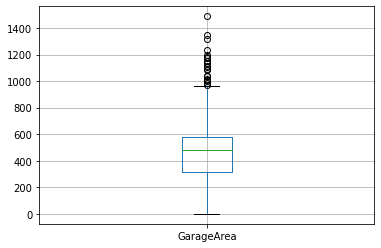

In [35]:
test_df1.boxplot('GarageArea')

In [36]:
## Here we are filling with median
test_df1.GarageArea.fillna(test_df1.GarageArea.median(), inplace=True)

In [37]:
## Here we are filling with mode
test_df1.SaleType.fillna(test_df1.SaleType.mode()[0], inplace=True)

In [38]:
## We are Going to fill the missing value using mode
test_df1.GarageQual.fillna(test_df1.GarageQual.mode()[0], inplace=True)

In [39]:
## here wer are filling the missing value using mode
test_df1.GarageCond.fillna(test_df1.GarageCond.mode()[0], inplace=True)

In [40]:
test_df1.to_csv('formulatedtest.csv', index=False)